# Multinomial Logistic Regression

## Import relevant libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
from sklearn.datasets import make_classification

## Create classification data

In [27]:
X, y = make_classification(n_samples = 10, n_features = 2, n_informative = 2, n_redundant = 0, n_classes = 3, n_clusters_per_class = 1, class_sep = 5, shuffle=False)

In [28]:
X

array([[-5.10699211,  5.37078206],
       [-5.55866252,  5.81666223],
       [-5.48453316,  5.82226628],
       [-5.08643114,  5.41577268],
       [-5.9809092 , -3.61247262],
       [-5.11465919, -6.17636072],
       [-5.0236118 , -5.51927907],
       [ 5.34813537,  4.80325999],
       [ 4.45638496,  5.42775631],
       [ 6.00976256,  4.25330605]])

In [29]:
y

array([0, 0, 0, 0, 1, 1, 1, 2, 2, 2])

Text(0,0.5,'X2')

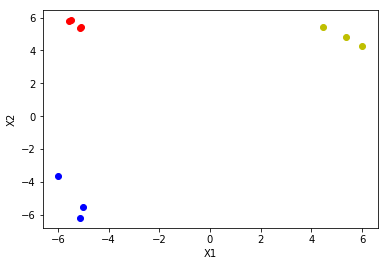

In [30]:
red = plt.scatter(X[:4,0], X[:4,1], c='r')
blue = plt.scatter(X[4:7,0], X[4:7,1], c='b')
yellow = plt.scatter(X[7:,0], X[7:,1], c='y')
plt.xlabel("X1")
plt.ylabel("X2")

## One vs. All split

In [31]:
result = {}

i=0
for v in y:
    if v not in result.keys():
            result[v] = [0] * len(y)
    result[v][i] = 1
    i+=1

y_0 = result[0]
y_1 = result[1]
y_2 = result[2]

for key in result.keys():
        print('{}: {}'.format(key, result[key]))

0: [1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
1: [0, 0, 0, 0, 1, 1, 1, 0, 0, 0]
2: [0, 0, 0, 0, 0, 0, 0, 1, 1, 1]


## Define relevant functions

In [32]:
def sigmoid(theta, x):
    return 1. / (1. + np.exp(-np.dot(x, theta)))

def gradient(theta, x, y):
    first_calc = sigmoid(theta, x) - np.squeeze(y)
    final_calc = np.dot(x.transpose(), first_calc)
    return final_calc

def cost_func(theta, x, y):
    hypothesis = sigmoid(theta,x)
    y = np.squeeze(y)
    step1 = y * np.log(hypothesis)
    step2 = (1-y) * np.log(1 - hypothesis)
    final = -step1 - step2
    return np.mean(final)

def gradient_descent(theta_opt, X, y, alpha=.001, min_change=.001):
    # Set-up cost-iteration list
    cost_iter = []
    cost = cost_func(theta_opt, X, y)
    cost_iter.append([0, cost])
    change_cost = 1
    i = 1
    while(change_cost > min_change):
        old_cost = cost
        theta_opt = theta_opt - (alpha * gradient(theta_opt, X, y))
        cost = cost_func(theta_opt, X, y)
        cost_iter.append([i, cost])
        change_cost = old_cost - cost
        i+=1
    return theta_opt, np.array(cost_iter)

## Fit the parameters for each classifier

In [33]:
shape = X.shape[1]
betas0 = np.zeros(shape)
betas1 = np.zeros(shape)
betas2 = np.zeros(shape)

fitted_values0, cost_iter = gradient_descent(betas0, X, y_0)
fitted_values1, cost_iter = gradient_descent(betas1, X, y_1)
fitted_values2, cost_iter = gradient_descent(betas2, X, y_2)

fitted_values = np.asarray([fitted_values0, fitted_values1, fitted_values2])

fitted_values

array([[-0.18607235,  0.20464495],
       [-0.06589595, -0.52040554],
       [ 0.52296785,  0.03111736]])

## Predict values

In [37]:
predictions = []

for i in range(10):
    predictions.append(sigmoid(fitted_values.transpose(), X[i]))

print(predictions)
print(np.argmax(predictions, 1))

[array([ 0.8858843 ,  0.07882247,  0.07560143]), array([ 0.90244258,  0.06533075,  0.06145633]), array([ 0.9013235 ,  0.064856  ,  0.06374119]), array([ 0.88642718,  0.07704272,  0.07645513]), array([ 0.5923304 ,  0.90670651,  0.03767941]), array([ 0.42256212,  0.97211127,  0.05380948]), array([ 0.45146893,  0.96095824,  0.05738187]), array([ 0.49695574,  0.05457475,  0.95009153]), array([ 0.5699269,  0.042359 ,  0.9241028]), array([ 0.43835694,  0.06853187,  0.96357041])]
[0 0 0 0 1 1 1 2 2 2]


## Visualize classifier

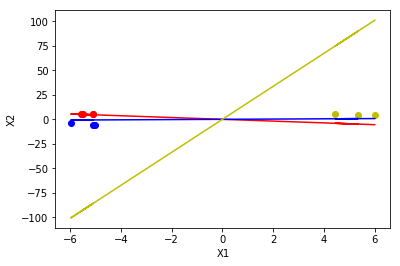

In [35]:
red = plt.scatter(X[:4,0], X[:4,1], c='r')
blue = plt.scatter(X[4:7,0], X[4:7,1], c='b')
yellow = plt.scatter(X[7:,0], X[7:,1], c='y')
plt.xlabel("X1")
plt.ylabel("X2")

plt.plot(X[:,0], fitted_values[0][0]/fitted_values[0][1]*X[:,0], c='r')
plt.plot(X[:,0], fitted_values[1][0]/fitted_values[1][1]*X[:,0], c='b')
plt.plot(X[:,0], fitted_values[2][0]/fitted_values[2][1]*X[:,0], c='y')